# Raster Data Tutorials


This tutorial is designed to show you how to read and work with raster data. We have 4 different goals here:
1. Loading a raster dataset with xarray
1. Subsetting the raster dataset along its coordinate axes
1. Plotting the raster dataset (with xarray and matplotlib)
1. Computing streamlines from a vector field
1. Interpolating values along a line from a raster dataset

So, lets start by importing the necessary modules:

In [85]:
import xarray as xr
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys

sys.path.append('/mnt/data01/Code/')
import NDH_Tools as ndh

#### 1 -- Opening the dataset
`xarray` is the primary package for opening and plotting raster data. Built on top of xarray is another package called `rioxarray`, which provides some functionality for doing coordinate reprojection of gridded data. `xarray` cannot natively open GeoTIFF format files, but sometimes `rioxarray` messes up NetCDFs when it tries to read them in. As a result, it might behoove you to try using both, if you are finding the data structure of the file, when read in, does not look how you expect it should.

In [86]:
datadir = '/mnt/data01/Data/Antarctic_Velocity/'
fn = glob.glob(datadir+'*.nc')

########## Read in with rioxarray
data_rxr = rxr.open_rasterio(fn[0])
data_rxr

####### Reading with xarray
data = xr.open_dataset(fn[0])
data

<xarray.Dataset>
Dimensions:       (x: 12445, y: 12445)
Coordinates:
  * x             (x) float64 -2.8e+06 -2.8e+06 -2.799e+06 ... 2.799e+06 2.8e+06
  * y             (y) float64 2.8e+06 2.8e+06 2.799e+06 ... -2.799e+06 -2.8e+06
    lat           (y, x) float64 ...
    lon           (y, x) float64 ...
Data variables:
    coord_system  |S1 ...
    VX            (y, x) float32 ...
    VY            (y, x) float32 ...
    STDX          (y, x) float32 ...
    STDY          (y, x) float32 ...
    ERRX          (y, x) float32 ...
    ERRY          (y, x) float32 ...
    CNT           (y, x) int32 ...
    SOURCE        (y, x) int8 ...
Attributes: (12/27)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        v_mix.v8Jul2019.nc
    title:                     MEaSURES Antarctica Ice Velocity Map 450m spacing
    product_version:            
    ...                        ...
    time_coverage_start:       1995-01-01
    time_coverage_end:         2016-12-31
    project:                   NASA/MEaSUREs
    creator_name:              J. Mouginot
    comment:                    
    license:                   No restrictions on access or use.

#### 2 - Subsetting by the coordinate axes

You can see, from the xarray output above, that this dataset has two different dimensions (x and y) which describe variation of each of the provided variables. You can access just the values that describe these dimensions using `data['x']` or `data['y']`. To downselect the data to a specific range of xs and ys, we can use a method that exists on xarray datasets called `.sel`

In [15]:
xs = [-1.6*10**6,0]
ys = [-1.6*10**6,0]

subset_slices = {'x':slice(xs[0],xs[1]),'y':slice(ys[1],ys[0])}

data_sub = data.sel(subset_slices)
data_sub

<xarray.Dataset>
Dimensions:       (x: 3556, y: 3555)
Coordinates:
  * x             (x) float64 -1.6e+06 -1.599e+06 -1.599e+06 ... -550.0 -100.0
  * y             (y) float64 -350.0 -800.0 -1.25e+03 ... -1.599e+06 -1.6e+06
    lat           (y, x) float64 ...
    lon           (y, x) float64 ...
Data variables:
    coord_system  |S1 b''
    VX            (y, x) float32 ...
    VY            (y, x) float32 ...
    STDX          (y, x) float32 ...
    STDY          (y, x) float32 ...
    ERRX          (y, x) float32 ...
    ERRY          (y, x) float32 ...
    CNT           (y, x) int32 ...
    SOURCE        (y, x) int8 ...
Attributes: (12/27)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        v_mix.v8Jul2019.nc
    title:                     MEaSURES Antarctica Ice Velocity Map 450m spacing
    product_version:            
    ...                        ...
    time_coverage_start:       1995-01-01
    time_coverage_end:         2016-12-31
    project:                   NASA/MEaSUREs
    creator_name:              J. Mouginot
    comment:                    
    license:                   No restrictions on access or use.

#### 3 - Plotting the dataset

There are lots of different ways to plot raster data. Common types of plots are:
* An image (for scalar data - `imshow`)
* A contour plot (for scalar data - `contour` or `contourf`)
* A quiver plot (for vector data - `quiver`)
* A streamplot (for vector data - `streamplot`)

Below, we will calculate the speed from the velocity fields, and generate a few plots as examples of the above. We will use the plot methods from xarray, and also using matplotlib

In [24]:
speed = np.sqrt(data_sub['VX'].values**2 + data_sub['VY'].values**2)
data_sub['speed'] = (('y','x'),speed)

data_sub

<xarray.Dataset>
Dimensions:       (x: 3556, y: 3555)
Coordinates:
  * x             (x) float64 -1.6e+06 -1.599e+06 -1.599e+06 ... -550.0 -100.0
  * y             (y) float64 -350.0 -800.0 -1.25e+03 ... -1.599e+06 -1.6e+06
    lat           (y, x) float64 ...
    lon           (y, x) float64 ...
Data variables:
    coord_system  |S1 b''
    VX            (y, x) float32 1.002 0.3267 0.03414 -0.05143 ... nan nan nan
    VY            (y, x) float32 -37.75 -37.11 -36.72 -36.36 ... nan nan nan nan
    STDX          (y, x) float32 ...
    STDY          (y, x) float32 ...
    ERRX          (y, x) float32 ...
    ERRY          (y, x) float32 ...
    CNT           (y, x) int32 ...
    SOURCE        (y, x) int8 ...
    speed         (y, x) float32 37.76 37.11 36.72 36.36 ... nan nan nan nan
Attributes: (12/27)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        v_mix.v8Jul2019.nc
    title:                     MEaSURES Antarctica Ice Velocity Map 450m spacing
    product_version:            
    ...                        ...
    time_coverage_start:       1995-01-01
    time_coverage_end:         2016-12-31
    project:                   NASA/MEaSUREs
    creator_name:              J. Mouginot
    comment:                    
    license:                   No restrictions on access or use.

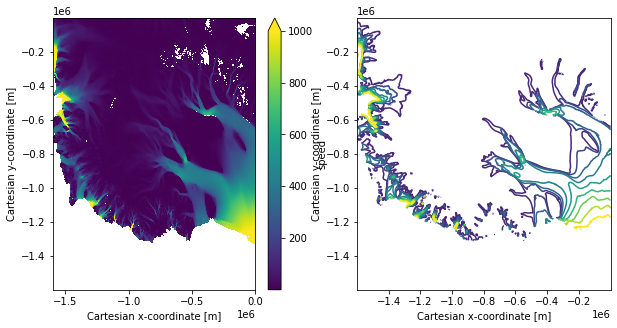

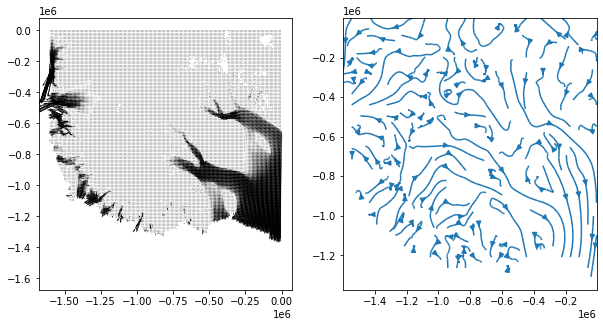

In [39]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
data_sub['speed'].plot.imshow(vmax=1000)

plt.subplot(1,2,2)
data_sub['speed'].plot.contour(levels=np.arange(0,1000,100))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.quiver(data_sub['x'].values[::20],np.flipud(data_sub['y'].values[::20]),np.flipud(data_sub['VX'].values[::20,::20]),np.flipud(data_sub['VY'].values[::20,::20]))

plt.subplot(1,2,2)
plt.streamplot(data_sub['x'].values[::20],np.flipud(data_sub['y'].values[::20]),np.flipud(data_sub['VX'].values[::20,::20]),np.flipud(data_sub['VY'].values[::20,::20]))

#### 4 -- Generating a flowline through a region of interest

Here we generate a specific streamline based on a seed point in a vector field.

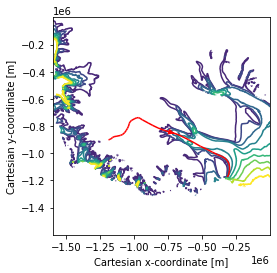

In [58]:
startpoints = np.array([[-0.6*10**6,-1.35*10**6], [-0.9*10**6,-0.45*10**6]])

data_sub['speed'].plot.contour(levels=np.arange(0,1000,100))
streamlines = plt.streamplot(data_sub['x'].values,np.flipud(data_sub['y'].values),np.flipud(data_sub['VX'].values),np.flipud(data_sub['VY'].values), 
                             start_points=[startpoints.T[0,:]],color='red')

########### Here we extract the coordinate information along the streamline
sl = [streamlines.lines.get_paths()[0].vertices[0]]
for i in streamlines.lines.get_paths():
    sl.append(i.vertices[1])

sl = np.array(sl)

plt.gca().set_aspect('equal')

#### 5 -- Interpolate and extract the values along those points

The confusing part here is constructing the right objects to use to index the xarray object. We need to construct two objects -- one that contains all the x coordinates for the points we want to extract, and one that contains all of the y coordinates for the points we want to extract. Critically, these objects must have some new "dimension". I use here a dimension called the "vector_index", but this can be anything -- this is just a constructed "axis" along which we are describing variations in the observations.

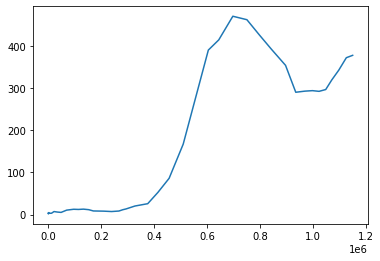

In [83]:
x_search = xr.DataArray(sl[:,0],dims=['vector_index'])
y_search = xr.DataArray(sl[:,1],dims=['vector_index'])
extracted_values = data_sub['speed'].interp(x=x_search,y=y_search)

dists = ndh.distance_vector(sl[:,0],sl[:,1])

plt.plot(dists,extracted_values.values)